# Imports

In [1]:
import sys
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout,confidence_interval,multiple_runs
from model.utils import SocialPolicy

# Parameters settings

Default parameters. Unless explicitly overriden, these values are used in all scenarios

In [2]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.0,
    mask_efficacy = 0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability =    0.1,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    herding_behavior_mean = 0.7,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20),
    extroversion_mean = 0.5,
    extroversion_stdev = 0.2,
    min_behaviors_to_copy = 1 
)


# Simulation setup

In [3]:
population_size = 1000
simulation_cycles = 180 # days

In [4]:
seed = 314

In [5]:
np.random.seed(seed)
scenario = {}

# Scenarios

## Scenario 1

Do nothing.  In order to print out where every agent is for every step of the day, every 20 days, set debug to True when you make the CovidModel.  You can also set debug to True on multiple runs to print stats out there as well.

In [6]:
sc = 1
params = copy.deepcopy(common_parameters)
set_parameters(params)
#model = CovidModel(debug = True)
model = CovidModel()
seed = 4
np.random.seed(seed)
setup_city_layout(model, population_size)

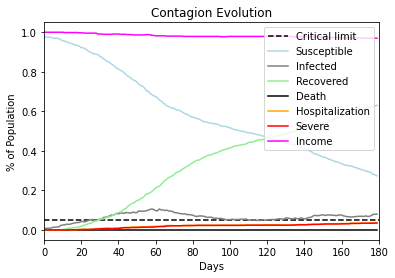

In [7]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

To save time these samples were run with 3 runs, but significant results often require 30 runs, so these numbers should be changed during debugging.

In [8]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[8288, 8979, 1034, 372, 4047, 7043, 3349, 2717, 7193, 2589, 3703, 7338, 1390, 7609, 7481, 9081, 1581, 4828, 738, 5345, 6504, 9292, 6797, 9851, 8886, 5616, 137, 4239, 6215, 2107]
run with seed 8288:
run with seed 8979:
run with seed 1034:
run with seed 372:
run with seed 4047:
run with seed 7043:
run with seed 3349:
run with seed 2717:
run with seed 7193:
run with seed 2589:
run with seed 3703:
run with seed 7338:
run with seed 1390:
run with seed 7609:
run with seed 7481:
run with seed 9081:
run with seed 1581:
run with seed 4828:
run with seed 738:
run with seed 5345:
run with seed 6504:
run with seed 9292:
run with seed 6797:
run with seed 9851:
run with seed 8886:
run with seed 5616:
run with seed 137:
run with seed 4239:
run with seed 6215:
run with seed 2107:
using average of time series:
stats on susceptible:
data: [0.16537777777777776, 0.5622444444444444, 0.906372222222222, 0.20814999999999995, 0.1992222222222222, 0.18589444444444

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 2

Complete lockdown

In [28]:
sc = 2
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]
set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)

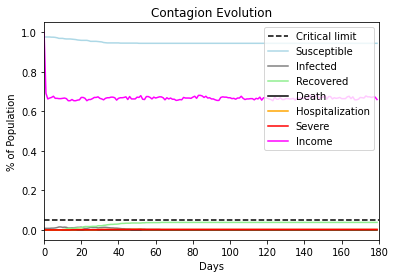

In [29]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [30]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[4858, 9240, 4351, 5390, 6922, 7109, 933, 889, 268, 3306, 1974, 7193, 4681, 6372, 7859, 9433, 1416, 2387, 3040, 8778, 3734, 8199, 7258, 3631, 3863, 2528, 452, 6798, 1759, 1124]
run with seed 4858:
run with seed 9240:
run with seed 4351:
run with seed 5390:
run with seed 6922:
run with seed 7109:
run with seed 933:
run with seed 889:
run with seed 268:
run with seed 3306:
run with seed 1974:
run with seed 7193:
run with seed 4681:
run with seed 6372:
run with seed 7859:
run with seed 9433:
run with seed 1416:
run with seed 2387:
run with seed 3040:
run with seed 8778:
run with seed 3734:
run with seed 8199:
run with seed 7258:
run with seed 3631:
run with seed 3863:
run with seed 2528:
run with seed 452:
run with seed 6798:
run with seed 1759:
run with seed 1124:
using average of time series:
stats on susceptible:
data: [0.9770333333333335, 0.8731111111111111, 0.976722222222222, 0.9148388888888892, 0.7040722222222221, 0.9627722222222221, 

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 3

Start with complete lockdown then gradually unlock schools on simulation day 30, 60 and 90


In [31]:
sc = 3
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

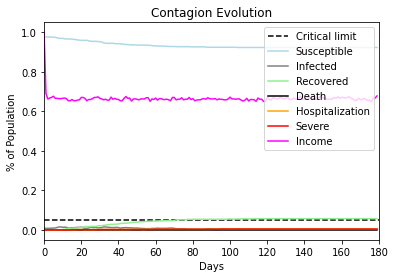

In [32]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [33]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[4368, 1050, 3953, 335, 4552, 4509, 9349, 7260, 383, 4376, 2657, 6865, 2695, 3979, 6337, 2115, 2075, 3339, 2436, 8930, 9138, 7951, 2063, 6611, 345, 346, 2317, 7961, 6197, 1298]
run with seed 4368:
run with seed 1050:
run with seed 3953:
run with seed 335:
run with seed 4552:
run with seed 4509:
run with seed 9349:
run with seed 7260:
run with seed 383:
run with seed 4376:
run with seed 2657:
run with seed 6865:
run with seed 2695:
run with seed 3979:
run with seed 6337:
run with seed 2115:
run with seed 2075:
run with seed 3339:
run with seed 2436:
run with seed 8930:
run with seed 9138:
run with seed 7951:
run with seed 2063:
run with seed 6611:
run with seed 345:
run with seed 346:
run with seed 2317:
run with seed 7961:
run with seed 6197:
run with seed 1298:
using average of time series:
stats on susceptible:
data: [0.6905555555555556, 0.8569555555555556, 0.5269833333333334, 0.9154444444444443, 0.45054999999999995, 0.5442388888888888

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 4

Like scenario 3 but simulate the start of a public campaing in day 30 to reinforce the importance of social distancing and consequently reduce the overall risk tolerance of the population

In [34]:
sc = 4
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

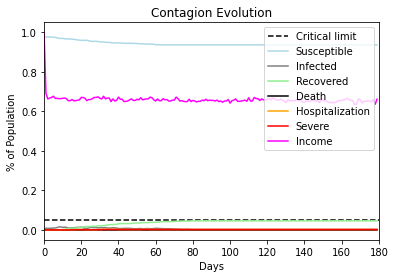

In [35]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [36]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[5909, 4638, 6427, 214, 9287, 75, 6029, 6613, 1618, 8832, 8570, 5992, 8867, 2237, 5062, 7133, 2956, 5719, 6064, 57, 5730, 5966, 7209, 3396, 691, 7244, 5105, 9744, 3110, 9088]
run with seed 5909:
run with seed 4638:
run with seed 6427:
run with seed 214:
run with seed 9287:
run with seed 75:
run with seed 6029:
run with seed 6613:
run with seed 1618:
run with seed 8832:
run with seed 8570:
run with seed 5992:
run with seed 8867:
run with seed 2237:
run with seed 5062:
run with seed 7133:
run with seed 2956:
run with seed 5719:
run with seed 6064:
run with seed 57:
run with seed 5730:
run with seed 5966:
run with seed 7209:
run with seed 3396:
run with seed 691:
run with seed 7244:
run with seed 5105:
run with seed 9744:
run with seed 3110:
run with seed 9088:
using average of time series:
stats on susceptible:
data: [0.6755388888888889, 0.5148407148407148, 0.939227777777778, 0.9276444444444446, 0.8526555555555556, 0.9718333333333333, 0.94

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 5

Like scenario 4 but start the campaing in day 1

In [37]:
sc = 5
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 1))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

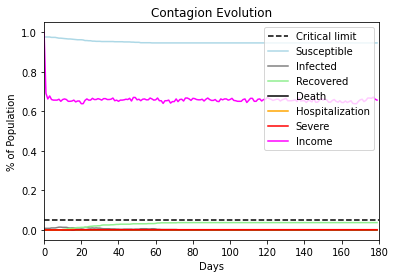

In [38]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [39]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[4763, 476, 5769, 2266, 3403, 5939, 8676, 646, 1812, 5126, 6732, 8120, 9650, 2390, 8410, 979, 1768, 2324, 1616, 7864, 6071, 4609, 9359, 4829, 434, 4307, 4648, 4280, 7352, 9106]
run with seed 4763:
run with seed 476:
run with seed 5769:
run with seed 2266:
run with seed 3403:
run with seed 5939:
run with seed 8676:
run with seed 646:
run with seed 1812:
run with seed 5126:
run with seed 6732:
run with seed 8120:
run with seed 9650:
run with seed 2390:
run with seed 8410:
run with seed 979:
run with seed 1768:
run with seed 2324:
run with seed 1616:
run with seed 7864:
run with seed 6071:
run with seed 4609:
run with seed 9359:
run with seed 4829:
run with seed 434:
run with seed 4307:
run with seed 4648:
run with seed 4280:
run with seed 7352:
run with seed 9106:
using average of time series:
stats on susceptible:
data: [0.5089111111111112, 0.9599777777777777, 0.8077105379188712, 0.4824499999999999, 0.4930888888888889, 0.45281111111111116

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 6

Begins with complete lockdown for 30 days, then all sectors are being gradually "unlocked"

In [40]:
sc = 6
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 120))

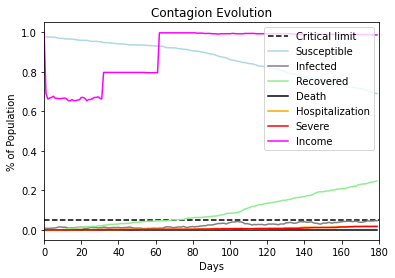

In [41]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [42]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[7185, 3061, 6768, 7952, 2845, 146, 2971, 962, 5208, 2665, 9399, 4810, 9159, 9450, 8935, 6944, 1934, 5256, 6536, 5007, 5520, 4115, 8972, 6868, 4773, 9534, 6328, 4034, 7027, 5835]
run with seed 7185:
run with seed 3061:
run with seed 6768:
run with seed 7952:
run with seed 2845:
run with seed 146:
run with seed 2971:
run with seed 962:
run with seed 5208:
run with seed 2665:
run with seed 9399:
run with seed 4810:
run with seed 9159:
run with seed 9450:
run with seed 8935:
run with seed 6944:
run with seed 1934:
run with seed 5256:
run with seed 6536:
run with seed 5007:
run with seed 5520:
run with seed 4115:
run with seed 8972:
run with seed 6868:
run with seed 4773:
run with seed 9534:
run with seed 6328:
run with seed 4034:
run with seed 7027:
run with seed 5835:
using average of time series:
stats on susceptible:
data: [0.9709166666666665, 0.7657564657564658, 0.7205960705960706, 0.9480633023461706, 0.7096944444444445, 0.9332337317397

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 7

Like scenario 6 but in day 1 a campaign to encourage social distancing is started and the overall risk tolerance of people starts decreasing gradually.

In [43]:
sc = 7
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 1))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 120))

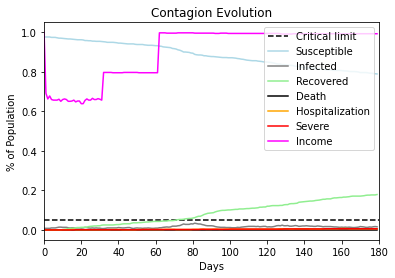

In [44]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [45]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[8862, 696, 3921, 2220, 7236, 7827, 1777, 5825, 4817, 5708, 7677, 5860, 8262, 3387, 1610, 9775, 9893, 9535, 8574, 920, 1110, 8266, 1887, 6501, 282, 4738, 3216, 8639, 7126, 8295]
run with seed 8862:
run with seed 696:
run with seed 3921:
run with seed 2220:
run with seed 7236:
run with seed 7827:
run with seed 1777:
run with seed 5825:
run with seed 4817:
run with seed 5708:
run with seed 7677:
run with seed 5860:
run with seed 8262:
run with seed 3387:
run with seed 1610:
run with seed 9775:
run with seed 9893:
run with seed 9535:
run with seed 8574:
run with seed 920:
run with seed 1110:
run with seed 8266:
run with seed 1887:
run with seed 6501:
run with seed 282:
run with seed 4738:
run with seed 3216:
run with seed 8639:
run with seed 7126:
run with seed 8295:
using average of time series:
stats on susceptible:
data: [0.26892222222222223, 0.9632922632922635, 0.2985418052783322, 0.9469833333333332, 0.5211995577667218, 0.95924999999999

(<function dict.items>, <function dict.items>, <function dict.items>)